# Project: Email Spam Filtering
## AI LAB Project
### Faculty: Miss Shaifa
### Group Members: Abdul Rauf, Aamir Ali, Alikarim Ashraf

# Step 1: Define the data and classes

## Listing 2.4 Code to read in the contents of the files

In [1]:
import os  # Import the os module for interacting with the operating system (e.g., listing files)
import codecs  # Import the codecs module to read files with specific encodings

def read_in(folder):  # Define a function called read_in that takes a folder path as input
    files = os.listdir(folder)  # List all files in the given folder
    a_list = []  # Create an empty list to store the contents of each file

    for a_file in files:  # Loop through each file in the folder
        if not a_file.startswith("."):  # Skip hidden files that start with a dot
            f = codecs.open(folder + a_file, "r",  # Open the file in read mode
                            encoding="ISO-8859-1", errors="ignore")  # Specify encoding and ignore errors
            a_list.append(f.read())  # Read the content of the file and append it to the list
            f.close()  # Close the file after reading

    return a_list  # Return the list of file contents



## Listing 2.5 Code to verify that the data is uploaded and read in correctly

In [4]:
# Read all emails from the "spam" folder and store them in a list
spam_list = read_in("enron1/spam/")  

# Read all emails from the "ham" (non-spam) folder and store them in a list
ham_list = read_in("enron1/ham/")  

# Print the number of spam emails loaded
print(len(spam_list))  

# Print the number of ham emails loaded
print(len(ham_list))  

# Print the content of the first spam email to check the data
print(spam_list[0])  

# Print the content of the first ham email to check the data
print(ham_list[0])  


1500
3672
Subject: dobmeos with hgh my energy level has gone up! Stukm
Introducing
Doctor - formulated
Hgh
Human growth hormone - also called hgh
Is referred to in medical science as the master hormone. It is very plentiful
When we are young, but near the age of twenty - one our bodies begin to produce
Less of it. By the time we are forty nearly everyone is deficient in hgh,
And at eighty our production has normally diminished at least 90 - 95%.
Advantages of hgh:
- increased muscle strength
- loss in body fat
- increased bone density
- lower blood pressure
- quickens wound healing
- reduces cellulite
- improved vision
- wrinkle disappearance
- increased skin thickness texture
- increased energy levels
- improved sleep and emotional stability
- improved memory and mental alertness
- increased sexual potency
- resistance to common illness
- strengthened heart muscle
- controlled cholesterol
- controlled mood swings
- new hair growth and color restore
Read
More at this website
Unsubscrib

## Listing 2.6 Code to combine the data into a single structure

In [6]:
# Import the random module to shuffle the dataset randomly
import random  

# Create a list of tuples for spam emails, where each tuple is (email_content, "spam")
all_emails = [(email_content, "spam") for email_content in spam_list]  

# Append tuples for ham emails to the all_emails list, labeling them as "ham"
all_emails += [(email_content, "ham") for email_content in ham_list]  

# Set a seed for the random number generator to ensure reproducible shuffling
random.seed(42)  

# Shuffle the combined list of spam and ham emails randomly
random.shuffle(all_emails)  

# Print the total number of emails in the dataset
print(f"Dataset size = {str(len(all_emails))} emails")  
print(type(all_emails))


Dataset size = 5172 emails
<class 'list'>


# Step 2: Split into Words

## Listing 2.7 Code to run a tokenizer over text

In [9]:
# Import the NLTK library for natural language processing
import nltk  

# Import the word_tokenize function from NLTK to split text into words
from nltk import word_tokenize  

# Download the 'punkt' tokenizer models, required for word_tokenize to work
nltk.download('punkt')  

# Define a function to tokenize input text into a list of words
def tokenize(input):
    # Initialize an empty list to store words
    word_list = []  
    # Use NLTK's word_tokenize to split the input text into individual words
    for word in word_tokenize(input):  
        # Append each word to the word_list
        word_list.append(word)  
    # Return the list of tokenized words
    return word_list  

# Example usage: tokenize the third ham email in the dataset
#print(tokenize("What's the best way to split a sentence into words?"))
print(ham_list[2])
print(tokenize(ham_list[2]))  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Subject: calpine daily gas nomination
- calpine daily gas nomination 1. Doc
['Subject', ':', 'calpine', 'daily', 'gas', 'nomination', '-', 'calpine', 'daily', 'gas', 'nomination', '1', '.', 'Doc']


# Step 3: Extract Features


## Listing 2.8 Code to extract the features

In [12]:
# Import the word_tokenize function from NLTK to split text into words
from nltk.tokenize import word_tokenize  

# Define a function to extract features from a text for the Naive Bayes classifier
def get_features(text):
    # Initialize an empty dictionary to store features
    features = {}  
    # Convert text to lowercase and tokenize it into words
    word_list = [word for word in word_tokenize(text.lower())]  
    # Mark each word as a feature with a boolean value True
    for word in word_list:  
        features[word] = True  
    # Return the dictionary of features
    return features  

# Apply get_features to all emails and pair each feature set with its label (spam/ham)
all_features = [(get_features(email), label)  
                for (email, label) in all_emails]  

# Print the feature dictionary of the third ham email to inspect
print(get_features(ham_list[2]))  

# Print the total number of emails in the dataset after feature extraction
print(len(all_features))  

# Print the number of features (unique words) in the first email
print(len(all_features[0][0]))  

# Print the number of features (unique words) in the 100th email
print(len(all_features[99][0]))  


{'subject': True, ':': True, 'calpine': True, 'daily': True, 'gas': True, 'nomination': True, '-': True, '1.': True, 'doc': True}
5172
27
53


# Step 4: Train the classifier

## Listing 2.9 Code to train a Naïve Bayes classifier

In [15]:
# Import the NaiveBayesClassifier and classify module from NLTK
from nltk import NaiveBayesClassifier, classify  

# Define a function to train a Naive Bayes classifier
def train(features, proportion):
    # Calculate the number of emails to use for training based on the given proportion
    train_size = int(len(features) * proportion)  

    # Split the dataset into training set (first part) and test set (remaining part)
    train_set = features[:train_size]  
    test_set = features[train_size:]  

    # Print the number of emails in the training set
    print(f"Training set size = {len(train_set)} emails")  
    # Print the number of emails in the test set
    print(f"Test set size = {len(test_set)} emails")  

    # Train a Naive Bayes classifier using the training set
    classifier = NaiveBayesClassifier.train(train_set)  
    # Return the training set, test set, and the trained classifier
    return train_set, test_set, classifier  

# Call the train function on all_features with 80% of the data for training
train_set, test_set, classifier = train(all_features, 0.8)  


Training set size = 4137 emails
Test set size = 1035 emails


# Step 5: Test & Evaluate

## Listing 2.10 Code to evaluate classifier’s performance

In [18]:
# Import the classify module from NLTK
from nltk import classify  

# Define a function to evaluate the performance of a classifier
def evaluate(train_set, test_set, classifier):
    # Calculate and print the accuracy of the classifier on the training set
    print(f"Accuracy on the training set = {str(classify.accuracy(classifier, train_set))}")  

    # Calculate and print the accuracy of the classifier on the test set
    print(f"Accuracy of the test set = {str(classify.accuracy(classifier, test_set))}")  

    # Show the top 50 most informative features that distinguish spam from ham
    classifier.show_most_informative_features(50)  

# Call the evaluate function to check classifier performance
evaluate(train_set, test_set, classifier)  


Accuracy on the training set = 0.9608411892675852
Accuracy of the test set = 0.9420289855072463
Most Informative Features
               forwarded = True              ham : spam   =    198.3 : 1.0
                    2004 = True             spam : ham    =    143.8 : 1.0
                     nom = True              ham : spam   =    126.0 : 1.0
            prescription = True             spam : ham    =    122.9 : 1.0
                    pain = True             spam : ham    =     98.8 : 1.0
                  health = True             spam : ham    =     82.7 : 1.0
                     ect = True              ham : spam   =     76.8 : 1.0
                    2001 = True              ham : spam   =     75.8 : 1.0
                featured = True             spam : ham    =     74.7 : 1.0
              nomination = True              ham : spam   =     72.1 : 1.0
             medications = True             spam : ham    =     69.9 : 1.0
                  differ = True             spam : ha

## Listing 2.11 Code to check the contexts of specific words

In [20]:
# Import Text class from NLTK for concordance (context) analysis
from nltk.text import Text  
# Import word_tokenize function to split text into words
from nltk.tokenize import word_tokenize  

# Define a function to display concordance (context) of a specific word in a list of emails
def concordance(data_list, search_word):
    # Loop through each email in the provided list
    for email in data_list:  
        # Tokenize the email into words (lowercased for consistency)
        word_list = [word for word in word_tokenize(email.lower())]  
        # Create an NLTK Text object from the tokenized words
        text_list = Text(word_list)  
        # If the search word exists in this email, show its concordance (context)
        if search_word in word_list:  
            text_list.concordance(search_word)  

# Print header for concordance search in ham emails
print("STOCKS in HAM:")  
# Call the concordance function on ham emails to see context of the word "stocks"
concordance(ham_list, "stocks")  

# Print header for concordance search in spam emails
print("\n\nSTOCKS in SPAM:")  
# Call the concordance function on spam emails to see context of the word "stocks"
concordance(spam_list, "stocks")  


STOCKS in HAM:
Displaying 1 of 1 matches:
ad my portfolio is diversified into stocks that have lost even more money than
Displaying 1 of 1 matches:
ur member directory . * follow your stocks and news headlines , exchange files
Displaying 1 of 1 matches:
ur member directory . * follow your stocks and news headlines , exchange files
Displaying 1 of 1 matches:
ur member directory . * follow your stocks and news headlines , exchange files


STOCKS in SPAM:
Displaying 2 of 2 matches:
ims and do your own due diligence . stocks to play ( s 2 p ) profiles are not 
s obtained . investing in micro cap stocks is extremely risky and , investors 
Displaying 1 of 1 matches:
cautions that small and micro - cap stocks are high - risk investments and tha
Displaying 1 of 1 matches:
s obtained . investing in micro cap stocks is extremely risky and , investors 
Displaying 3 of 3 matches:
ancements but may be one of the few stocks left in this industry group that is
his email pertaining to investing , stoc

## Listing 2.12 Code to apply spam filtering to new emails

In [22]:
# Define a small list of test spam emails
test_spam_list = ["Participate in our new lottery!", "Try out this new medicine"]  

# Define a small list of test ham (non-spam) emails
test_ham_list = ["See the minutes from the last meeting attached",
                 "Investors are coming to our office on Monday"]  

# Create tuples of (email_content, "spam") for the test spam emails
test_emails = [(email_content, "spam") for email_content in test_spam_list]  

# Append tuples of (email_content, "ham") for the test ham emails
test_emails += [(email_content, "ham") for email_content in test_ham_list]  

# Convert the test emails into feature sets using the previously defined get_features function
new_test_set = [(get_features(email), label) for (email, label) in test_emails]  

# Evaluate the classifier on the new test set and print the results
evaluate(train_set, new_test_set, classifier)  


Accuracy on the training set = 0.9608411892675852
Accuracy of the test set = 1.0
Most Informative Features
               forwarded = True              ham : spam   =    198.3 : 1.0
                    2004 = True             spam : ham    =    143.8 : 1.0
                     nom = True              ham : spam   =    126.0 : 1.0
            prescription = True             spam : ham    =    122.9 : 1.0
                    pain = True             spam : ham    =     98.8 : 1.0
                  health = True             spam : ham    =     82.7 : 1.0
                     ect = True              ham : spam   =     76.8 : 1.0
                    2001 = True              ham : spam   =     75.8 : 1.0
                featured = True             spam : ham    =     74.7 : 1.0
              nomination = True              ham : spam   =     72.1 : 1.0
             medications = True             spam : ham    =     69.9 : 1.0
                  differ = True             spam : ham    =     66.7

## Listing 2.13 Code to print out the predicted label

In [24]:
# Loop through each email in the test spam list
for email in test_spam_list:  
    # Print the content of the spam email
    print(email)  
    # Classify the email using the trained classifier and print the predicted label
    print(classifier.classify(get_features(email)))  

# Loop through each email in the test ham list
for email in test_ham_list:  
    # Print the content of the ham email
    print(email)  
    # Classify the email using the trained classifier and print the predicted label
    print(classifier.classify(get_features(email)))  


Participate in our new lottery!
spam
Try out this new medicine
spam
See the minutes from the last meeting attached
ham
Investors are coming to our office on Monday
ham


## Listing 2.14 Code to classify the emails read in from the keyboard

In [26]:
# Start an infinite loop to allow the user to input emails for classification
while True:  
    # Prompt the user to type an email; pressing Enter without typing stops the loop
    email = input("Type in your email here (or press 'Enter'): ")  

    # If the input is empty, break the loop and stop asking for emails
    if len(email) == 0:  
        break  
    else:
        # Extract features from the input email
        features = get_features(email)  
        # Use the trained classifier to predict whether the email is spam or ham
        prediction = classifier.classify(features)  
        # Print the prediction result
        print(f"This email is likely {prediction}\n")  


Type in your email here (or press 'Enter'):  Hello, You win the lotter


This email is likely spam



Type in your email here (or press 'Enter'):  


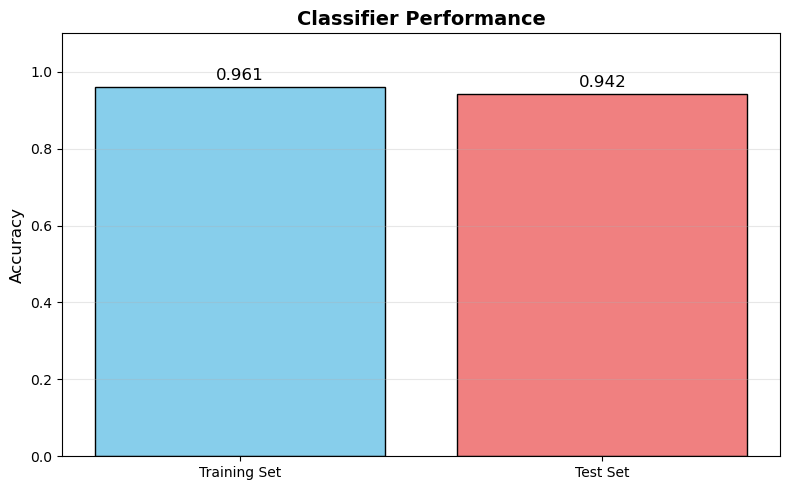

Training Accuracy: 0.9608
Test Accuracy: 0.9420


In [43]:
# ====================== ESSENTIAL PLOT 1: Accuracy Comparison ======================
# Import necessary libraries for plotting
import matplotlib.pyplot as plt  # For creating visualizations
import numpy as np  # For numerical operations

# Calculate model performance metrics
train_accuracy = classify.accuracy(classifier, train_set)  # Get accuracy on training data
test_accuracy = classify.accuracy(classifier, test_set)  # Get accuracy on test data

# Create the figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 5))  # Create figure with specified size

# Define plot data
labels = ['Training Set', 'Test Set']  # X-axis labels
accuracies = [train_accuracy, test_accuracy]  # Y-axis values
colors = ['skyblue', 'lightcoral']  # Color for each bar

# Create bar plot with specified colors and black edges
bars = ax.bar(labels, accuracies, color=colors, edgecolor='black')

# Add accuracy values on top of each bar for clarity
for bar, acc in zip(bars, accuracies):  # Loop through each bar and its corresponding accuracy
    height = bar.get_height()  # Get the height of the current bar
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,  # Position text at bar center
            f'{acc:.3f}',  # Format accuracy to 3 decimal places
            ha='center', va='bottom', fontsize=12)  # Center align text

# Configure axis labels and title
ax.set_ylabel('Accuracy', fontsize=12)  # Set Y-axis label
ax.set_title('Classifier Performance', fontsize=14, fontweight='bold')  # Set plot title
ax.set_ylim(0, 1.1)  # Set Y-axis limits from 0 to 1.1 (leaves room for labels)
ax.grid(axis='y', alpha=0.3)  # Add horizontal grid lines with low opacity

# Adjust layout and display plot
plt.tight_layout()  # Automatically adjust subplot parameters
plt.show()  # Display the plot

# Print accuracy metrics in text format
print(f"Training Accuracy: {train_accuracy:.4f}")  # Display training accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")  # Display test accuracy

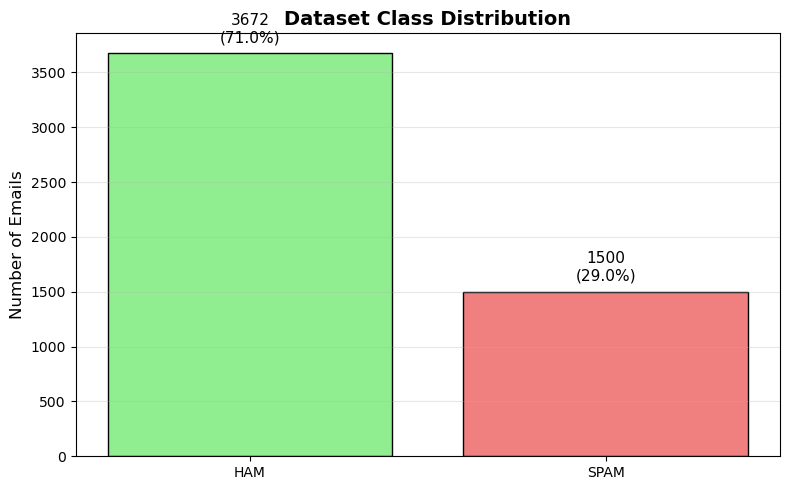

In [45]:
# ====================== ESSENTIAL PLOT 2: Class Distribution ======================
# Count classes: Count how many spam and ham emails are in the dataset
spam_count = sum(1 for _, label in all_emails if label == 'spam')  # Count spam emails
ham_count = sum(1 for _, label in all_emails if label == 'ham')    # Count ham emails

# Plot: Create a bar chart showing the distribution of spam vs ham emails
fig, ax = plt.subplots(figsize=(8, 5))  # Create figure with specified dimensions (8x5 inches)
labels = ['HAM', 'SPAM']  # X-axis labels for the two categories
counts = [ham_count, spam_count]  # Y-axis values - counts for each category
colors = ['lightgreen', 'lightcoral']  # Colors for ham (green) and spam (red)

# Create the bar chart with specified colors and black borders
bars = ax.bar(labels, counts, color=colors, edgecolor='black')

# Add count labels on top of each bar
for bar, count in zip(bars, counts):  # Loop through each bar and its corresponding count
    height = bar.get_height()  # Get the height of the current bar
    percentage = count/len(all_emails)*100  # Calculate percentage of total emails
    ax.text(bar.get_x() + bar.get_width()/2.,  # Position text at center of bar
            height + max(counts)*0.02,  # Position slightly above the bar
            f'{count}\n({percentage:.1f}%)',  # Display count and percentage
            ha='center', va='bottom', fontsize=11)  # Center align text

# Configure axis labels and title
ax.set_ylabel('Number of Emails', fontsize=12)  # Set Y-axis label
ax.set_title('Dataset Class Distribution', fontsize=14, fontweight='bold')  # Set plot title
ax.grid(axis='y', alpha=0.3)  # Add horizontal grid lines with low opacity

# Adjust layout and display plot
plt.tight_layout()  # Automatically adjust spacing between elements
plt.show()  # Display the plot